<h1><center>Laboratorio 8: Aprendizaje Supervisado 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Luis Gutiérrez 
- Nombre de alumno 2: Juan Carlos Cuevas

### **Link de repositorio de GitHub:** `https://github.com/LuisGutierrezG/LuisGutierrezG-LABS`

## Temas a tratar

- Aprendizaje Supervisado
- Flujos de datos a través de `Pipelines`.

## Reglas

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

## Objetivos principales del laboratorio

- Comprender el funcionamiento de clasificadores/regresores.
- Generar múltiples modelos predictivos.
- Comprender las ventajas de crear modelos en pipeline vs hacer las operaciones a mano.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre `DataFrames`.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
# !pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

# 1. Predicciones Futboleras

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones. 

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con los csv `statsplayers.csv` y `salarios.pickle`, donde deberán aplicar algoritmos de de aprendizaje supervisado (clasificación y regresión) en base a características que describen de jugadores de futbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [3]:
df_players = pd.read_csv('stats_players.csv')
df_players

Name          Nationality National_Position Club_Position  \
0      Cristiano Ronaldo             Portugal                LS            LW   
1           Lionel Messi            Argentina                RW            RW   
2                 Neymar               Brazil                LW            LW   
3            Luis Suárez              Uruguay                LS            ST   
4           Manuel Neuer              Germany                GK            GK   
...                  ...                  ...               ...           ...   
17583        Adam Dunbar  Republic of Ireland               NaN           Sub   
17584       Dylan McGoey  Republic of Ireland               NaN           Sub   
17585    Tommy Ouldridge              England               NaN           Res   
17586         Mark Foden             Scotland               NaN           Sub   
17587   Barry Richardson              England               NaN           Sub   

       Height  Weight Preffered_Foot  Age        Work_Rate  Weak_foot  ...  \
0         185      80          Right   32       High / Low          4  ...   
1         170      72           Left   29  Medium / Medium          4  ...   
2         174      68          Right   25    High / Medium          5  ...   
3         182      85          Right   30    High / Medium          4  ...   
4         193      92          Right   31  Medium / Medium          4  ...   
...       ...     ...            ...  ...              ...        ...  ...   
17583     183      82          Right   19  Medium / Medium          1  ...   
17584     185      80          Right   19  Medium / Medium          2  ...   
17585     173      61          Right   18    High / Medium          2  ...   
17586     180      80          Right   21  Medium / Medium          3  ...   
17587     185      77          Right   47  Medium / Medium          2  ...   

       Agility  Jumping  Heading  Shot_Power  Finishing  Long_Shots  Curve  \
0           90       95       85          92         93          90     81   
1           90       68       71          85         95          88     89   
2           96       61       62          78         89          77     79   
3           86       69       77          87         94          86     86   
4           52       78       25          25         13          16     14   
...        ...      ...      ...         ...        ...         ...    ...   
17583       27       56       14          16         13          13     11   
17584       28       53       12          17         12          11     12   
17585       54       61       41          44         28          42     35   
17586       34       48       15          23         14          12     13   
17587       38       51       12          13         11          16     12   

       Freekick_Accuracy  Penalties  Volleys  
0                     76         85       88  
1                     90         74       85  
2                     84         81       83  
3                     84         85       88  
4                     11         47       11  
...                  ...        ...      ...  
17583                 13         15       12  
17584                 13         16       12  
17585                 36         42       37  
17586                 12         24       12  
17587                 11         22       12  

[17588 rows x 39 columns]

## 1.1 Predicción de Seleccionados Nacionales 

Como primera tarea, Renacín, intrigado por la posibilidad de saber qué tan reconocido es un jugador, le consulta a su equipo si es posible predecir si un jugador será o no seleccionado nacional a partir de sus estadísticas en el juego. 

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

### 1.1.1 Generación de Labels para la Clasificación [Sin Puntaje]


Primero comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. 

Hecho esto, ¿Cuantos ejemplos por cada clase se tienen? Comente lo que observa.



**Respuesta:**

In [4]:
# exploración de datos
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               17588 non-null  object
 1   Nationality        17588 non-null  object
 2   National_Position  1075 non-null   object
 3   Club_Position      17587 non-null  object
 4   Height             17588 non-null  int64 
 5   Weight             17588 non-null  int64 
 6   Preffered_Foot     17588 non-null  object
 7   Age                17588 non-null  int64 
 8   Work_Rate          17588 non-null  object
 9   Weak_foot          17588 non-null  int64 
 10  Skill_Moves        17588 non-null  int64 
 11  Ball_Control       17588 non-null  int64 
 12  Dribbling          17588 non-null  int64 
 13  Marking            17588 non-null  int64 
 14  Sliding_Tackle     17588 non-null  int64 
 15  Standing_Tackle    17588 non-null  int64 
 16  Aggression         17588 non-null  int64

In [5]:
df_players.head()

Name Nationality National_Position Club_Position  Height  \
0  Cristiano Ronaldo    Portugal                LS            LW     185   
1       Lionel Messi   Argentina                RW            RW     170   
2             Neymar      Brazil                LW            LW     174   
3        Luis Suárez     Uruguay                LS            ST     182   
4       Manuel Neuer     Germany                GK            GK     193   

   Weight Preffered_Foot  Age        Work_Rate  Weak_foot  ...  Agility  \
0      80          Right   32       High / Low          4  ...       90   
1      72           Left   29  Medium / Medium          4  ...       90   
2      68          Right   25    High / Medium          5  ...       96   
3      85          Right   30    High / Medium          4  ...       86   
4      92          Right   31  Medium / Medium          4  ...       52   

   Jumping  Heading  Shot_Power  Finishing  Long_Shots  Curve  \
0       95       85          92         93          90     81   
1       68       71          85         95          88     89   
2       61       62          78         89          77     79   
3       69       77          87         94          86     86   
4       78       25          25         13          16     14   

   Freekick_Accuracy  Penalties  Volleys  
0                 76         85       88  
1                 90         74       85  
2                 84         81       83  
3                 84         85       88  
4                 11         47       11  

[5 rows x 39 columns]

In [6]:
# contamos NA de national position
df_players['National_Position'].isna().sum()

16513

In [7]:
# se reemplazan los valores NA por '0'
df_players['National_Position'].fillna('0', inplace=True)

df_players['National_Position'].value_counts()

0      16513
Sub      556
LCB       48
GK        47
RCB       46
LB        39
RB        38
RM        34
LM        32
ST        30
LCM       25
RCM       25
LDM       19
CAM       19
RDM       18
RS        18
LS        18
CB         9
CDM        9
CM         9
RW         7
LW         7
LWB        4
RAM        4
LAM        4
RWB        4
RF         3
LF         3
Name: National_Position, dtype: int64

In [8]:
# creamos columna seleccionado, 1 si es seleccionado, 0 si no
df_players['Seleccionado'] = df_players['National_Position'].apply(lambda x: 1 if x != '0' else 0)
df_players['Seleccionado'].value_counts()

0    16513
1     1075
Name: Seleccionado, dtype: int64

Se puede ver que más del 90% de los datos son de jugadores no seleccionados, por lo que tenemos clases fuertemente desbalanceadas. Esto puede ser un problema a la hora de entrenar un modelo, ya que este tenderá a predecir la clase mayoritaria, en este caso, la de jugadores no seleccionados.

### 1.1.2 Camino a la clasificación [1 punto]

<p align="center">
  <img src="https://c.tenor.com/SoXZJHWnhKAAAAAC/pitbull-medel.gif" width="500">
</p>

Para preprocesar el dataset, genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guardelo en algúna variable.

Luego, comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material ```Player_Stats_Report.html``` que viene en el zip del lab), al igual que las transformaciones aplicadas.

Hecho lo anterior, **defina al menos 3 pipelines para la clasificación**, en donde utilice el mismo ColumnTransformer definido anteriormente, pero que varie entre cada pipeline los clasificadores. 

Para seleccionar los clasificadores más adecuados, utilice la siguiente guía:

<p align="center">
  <img src="https://scikit-learn.org/stable/_static/ml_map.png" width="500">
</p>

<br/>

Con ella, comente y justifique cada una de las decisiones tomadas al momento de desarrollar su pipeline.

**Nota:** Si tiene problemas al utilizar OneHotEncoder puede utilizar el parámetro handle_unknown='ignore'. Esto hace que en la codificación se omitan las categorias que no aparecen en el entrenamiento. Pregunta dudosa (no tiene puntaje), ¿esto tiene sentido a nivel de modelos?.

**To-Do:**

- [ ] Genere un ```ColumnTransformer``` enfocado en preprocesar los datos.
- [ ] Indicar y Justificar que preprocesamiento utiliza sobre cada columna.
- [ ] Crear 3 ``pipelines`` con diferentes clasificadores.
- [ ] Para seleccionar los clasificadores base sus decisiones en la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [ ] No entrenar los ``pipelines`` aún.

**Nota:** No es necesario entrenar los clasificadores aún.

**Respuesta:**

In [71]:
# se define un pipeline para pre-procesar los datos con ColumnTransformer:
# - MinMaxScaler para las variables numéricas


# se define la clase ColumnSelector para seleccionar columnas específicas del dataframe
class ColumnSelector():
    def __init__(self, df, ind ,target = None):
        self.columns = df.columns
        self.num_cols = df.select_dtypes(include=['int', 'float', 'int64']).columns.difference(df.columns[df.nunique() == 2])
        self.bin_cols = df.columns[df.nunique() == 2].difference(df.select_dtypes(include=['object']).columns)
        self.cat_cols = df.select_dtypes(include=['object']).columns.difference([target,ind, 'National_Position'])
        self.target = target
        self.id = ind
        

columns = ColumnSelector(df_players.drop(columns=['Seleccionado']), 'Name')

In [72]:
prep = ColumnTransformer(transformers=[#('pass', 'passthrough',[columns.target,columns.id]),
                                       ("num", MinMaxScaler(), columns.num_cols),
                                       ("cat", OneHotEncoder(sparse_output = False,handle_unknown="ignore"), columns.cat_cols)
                                      ])

prep

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 Index(['Acceleration', 'Age', 'Aggression', 'Agility', 'Balance',
       'Ball_Control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Freekick_Accuracy', 'Heading', 'Height', 'Interceptions',
       'Jumping', 'Long_Pass', 'Long_Shots', 'Marking', 'Penalties',
       'Reactions', 'Short_Pass', 'Shot_Power', 'Skill_Moves',
       'Sliding_Tackle', 'Speed', 'Stamina', 'Standing_Tackle', 'Strength',
       'Vision', 'Volleys', 'Weak_foot', 'Weight'],
      dtype='object')),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Club_Position', 'Nationality', 'Preffered_Foot', 'Work_Rate'], dtype='object'))])

In [93]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

model_1 = Pipeline(steps=[('preprocesamiento',prep) , ("tree", DecisionTreeClassifier(criterion="entropy"))
                         ])

model_2 = Pipeline(steps=[('preprocesamiento',prep) , ("svc", SVC())
                         ])

model_3 = Pipeline(steps=[('preprocesamiento',prep) , ("KNN", KNeighborsClassifier(n_neighbors=3))
                         ])

### 1.1.3 Entrenemos los pipelines [1 punto]

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="350">
</p>


Ahora, entrene los `pipeline` generados en los pasos anteriores. Para esto, primero separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio).

En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`).


Luego, entrene los pipelines

Una vez entrenado su modelo, evalue su rendimiento a través de diferentes métricas, comentando que significa cada uno de los valores obtenidos. Puede usar la función `classification_report` para corroborar sus resultados.

- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?
- ¿Podrían mejorarse los resultados?, ¿Cómo?
- ¿Influye la cantidad de ejemplos por clase?

**To-Do**:

- [ ] Separar el conjunto de datos en entrenamiento y de prueba.
- [ ] Entrenar los `pipelines`.
- [ ] Utilizar las métricas para evaluar los modelos generados.


**Respuesta:**

In [87]:
X_train, X_test, y_train, y_test = train_test_split(df_players.drop(columns = ['Seleccionado', 'Name','National_Position']),
                                                    df_players['Seleccionado'],
                                                    #train_size = 0.2,
                                                    shuffle=True,
                                                    stratify=df_players['Seleccionado'],
                                                    random_state=0)

In [91]:
train_1 = model_1.fit(X_train, y_train)
y_pred_1 = train_1.predict(X_test)
print(classification_report(y_test, y_pred_1, target_names = ['No Seleccionado', 'Seleccionado']))

                 precision    recall  f1-score   support

No Seleccionado       0.96      0.96      0.96      4128
   Seleccionado       0.34      0.33      0.34       269

       accuracy                           0.92      4397
      macro avg       0.65      0.64      0.65      4397
   weighted avg       0.92      0.92      0.92      4397



In [92]:
train_2 = model_2.fit(X_train, y_train)
y_pred_2 = train_2.predict(X_test)
print(classification_report(y_test, y_pred_2, target_names = ['No Seleccionado', 'Seleccionado']))

                 precision    recall  f1-score   support

No Seleccionado       0.94      1.00      0.97      4128
   Seleccionado       0.82      0.07      0.12       269

       accuracy                           0.94      4397
      macro avg       0.88      0.53      0.55      4397
   weighted avg       0.94      0.94      0.92      4397



In [94]:
train_3 = model_3.fit(X_train, y_train)
y_pred_3 = train_3.predict(X_test)
print(classification_report(y_test, y_pred_3, target_names = ['No Seleccionado', 'Seleccionado']))

                 precision    recall  f1-score   support

No Seleccionado       0.95      0.99      0.97      4128
   Seleccionado       0.54      0.14      0.23       269

       accuracy                           0.94      4397
      macro avg       0.74      0.57      0.60      4397
   weighted avg       0.92      0.94      0.92      4397



**Respuesta**:

```
Comente de resultados observados y si es posible mejorar los resultados.
```

## 1.2 Predicción de posiciones de jugadores [2 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="500">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas. 

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características. 

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

Cabe señalar que al igual como lo realizado con la clasificación binaria, deberá justificar en base a la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) la elección del clasificador y se deben comentar los resultados obtenidos en la clasificación.

**Nota:** Clasifique solamente con las clases señaladas, si observa mas clases eliminelas de la clasficación.

**To-Do**:

- [ ] Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
- [ ] Cuente cuantos por clase quedan.
- [ ] Entrene el nuevo pipeline y ejecute una evaluación de este.  
- [ ] Comente los resultados obtenidos.

**Respuesta:**

In [113]:
#etiquetas
def etiqueta(value):
    if value in ['ST', 'CF']:
        return 'ataque'
    elif value in ['RW', 'CAM', 'LW']:
        return 'central_ataque'
    elif value in ['RM', 'CM', 'LM']:
        return 'central'
    elif value in ['RWB', 'CDM', 'LWB']:
        return 'central_defensa'
    elif value in ['RB', 'CB', 'LB']:
        return 'defensa'
    elif value == 'GK':
        return 'arquero'
    else:
        return 'otro'

df_players['Posicion']  = df_players.Club_Position.apply(lambda x: etiqueta(x))
df_players = df_players.drop(df_players[df_players.Posicion == 'otro'].index)

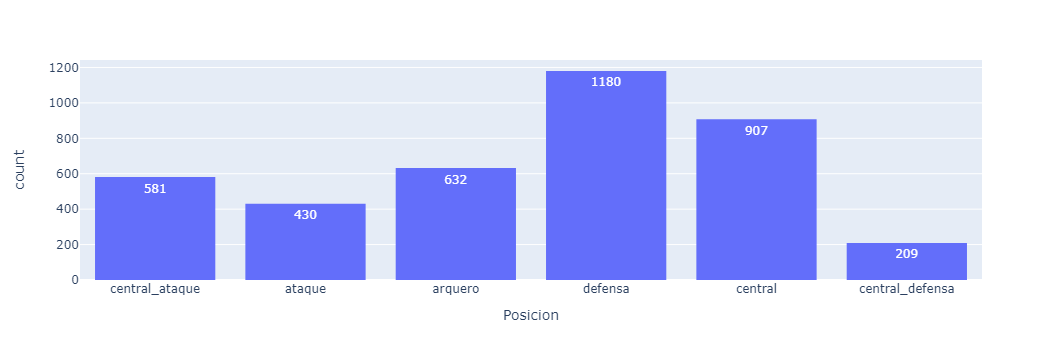

In [149]:
px.histogram(df_players, 'Posicion', text_auto = True)

**Respuesta**:

```
Comente de resultados observados y si es posible mejorar los resultados.
```

## 1.3 Predicción de Sueldos [2 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/3oEjHWtHAFcOKS4iA0/giphy.gif" width="460">
</p>

Queriendo ahondar aún más en el mercado del balompíe, Renacin, logra obtener (de una manera no muy formal) los sueldos de múltiples futbolistas y los guarda en el archivo ```sueldos.csv```. Con ellos les solicita que generen un regresor que les permita predecir el sueldo de los futbolistas en base a las características de los pichichis, esto, debido a su motivación por invertir y/o realizar especulación sobre los sueldos de jugadores.

Renacin es claro señalando que deben seguir utilizando la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y comenten cada uno de los pasos realizados, para obtener su regresión lineal. Señalándoles que no aceptara un $R^2$ inferior a 0.35 para el modelo solicitado.

Para esta parte usted tiene total libertad en la generación del regresor, la unica exigencia es que utilice un pipeline para generar la regresión y utilice la metrica $R^2$ para medir el rendimiento de esta.

**To-Do**:

- [ ] Explique en que consiste la métrica $R^2$
- [ ] Generar un pipeline para la regresión.
- [ ] Obtener un regresor con un $R^2$ superior a  $0.35$.
- [ ] Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?

**Respuesta**

In [15]:
### Código aquí ###

**Respuesta**:

```
Comente de resultados observados y si es posible mejorar los resultados.
```

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>